# Tutorial 05: Discrete Count Responses

#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1. Describe the Poisson regression estimation procedure (discrete counts as the response variable and explanatory variables).
2. Interpret the coefficients and $p$-values in the Poisson regression settings.
3. Discuss useful Poisson regression diagnostics and explain why they should be performed.
4. Write a computer script to perform Poisson regression and perform model diagnostics. Interpret and communicate the results from that computer script.

In [1]:
# Run this cell before continuing.
library(broom)
library(MASS)
library(glmbb)
library(cowplot)
library(tidyverse)
library(faraway)

source("tests_tutorial_05.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::select()    masks MASS::select()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




## Poisson Regression

- Poisson regression is a regression analysis designed for modelling **count data**, where the response variable represents the number of times an event occurs within a fixed interval of time or space. 

- Since **counts are nonnegative integers**, if we use linear regression, we might have a range problem by predicting negative counts. 

- By employing Poisson regression, we can analyze and predict event counts, such as the number of customer arrivals, disease occurrences, or traffic accidents, providing valuable insights into the factors influencing these events and enabling better decision-making.

**The Poisson Regression**

The Poisson regression model is another model in the family of *generalized linear models*, so you can use the function `glm()` to estimate it.

Since the expected value of counts is always positive, we can't use a linear regression to model it. Instead, we use a *function* of the linear component with a range $[0, + \inf)$ to model the conditional expectation

$$E[Y_i|\mathbf{X}_i] = e^{\beta_0 + \beta_1X_{i,1} + \ldots + \beta_pX_{i,p}}$$

or equivalently,

$$\log(E[Y_i|\mathbf{X}_i]) = \beta_0 + \beta_1X_{i,1} + \ldots + \beta_pX_{i,p}$$

The function that links the conditional expectation to the linear component, in this case the logarithmic function, is called the **link**. 

> The logarithmic function is not the only function that works but it is a natural choice for this distribution and the default link for this family

Usually, the mean of a Poisson distribution is called $\lambda$. This is an arbitrary choice, like using $\mu$ for the Normal distribution.

## Galapagos Islands

![img](https://naturegalapagos.com/wp-content/uploads/2013/10/where-are-the-galapagos-islands-map.jpg.webp)

In this tutorial you will work with the `galapagos` dataset, from the `faraway` package that contains information about 30 different Galapagos islands and the number of plant species found in each island. 

We will explore the relationship between the number of plant species in the islands and several geographic variables about the islands in this dataset. 

More information about this dataset can be found using `?gala`

In [2]:
# Load the data
galapagos <- 
    gala %>% 
    as_tibble(rownames = 'island') %>%
    select(-Endemics)

colnames(galapagos) <- str_to_lower(colnames(galapagos))

galapagos %>% 
    slice_sample(n = 3)

island,species,area,elevation,nearest,scruz,adjacent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SantaMaria,285,170.92,640,2.6,49.2,0.10
Fernandina,93,634.49,1494,4.3,95.3,4669.32
Caldwell,3,0.21,114,2.8,58.7,0.78


Let's start by exploring the association between the number of plant species found in an island, `species,` and the highest elevation of the island `elevation`.

We want to estimate the following Poisson regression: 

$$
\log(\lambda_i) = \beta_0 + \beta_1\times\text{elevation}_i
$$

where $\lambda_i = E[\texttt{species}_i|\texttt{elevation}_i]$ is the mean of the random variable `species`, given the information in `elevation`.

> We assume that (conditional of any of these covariates) `species` follows a Poisson distribution.

**Question 1.1**
<br>{points: 1}

Create a scatterplot of `species` versus `elevation` (via `geom_point()`). The `ggplot()` object's name will be `species_elevation_plot`. Recall that the response must be placed on the $y$-axis, whereas the continuous input must be on the $x$-axis. Include proper axis labels and title.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

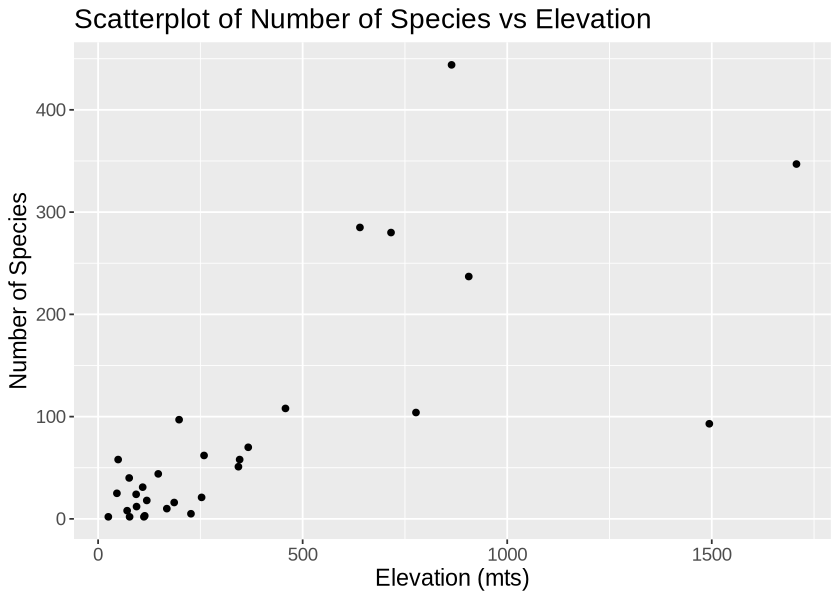

In [3]:
# Adjust these numbers so the plot looks good in your desktop.
options(repr.plot.width = 7, repr.plot.height = 5) 

# species_elevation_plot <- 
#   ... %>%
#   ggplot() +
#   ...(aes(..., ...)) +
#   labs(y = "Number of Species", x = "Elevation (mts)") +
#   ggtitle(Scatterplot of Number of Species vs Elevation) +
#   theme(text = element_text(size = 14)) 

### BEGIN SOLUTION
species_elevation_plot <- 
  galapagos %>%
  ggplot() +
  geom_point(aes(elevation, species)) +
  labs(y = "Number of Species", x = "Elevation (mts)") +
  ggtitle("Scatterplot of Number of Species vs Elevation") +
  theme(text = element_text(size = 14))

### END SOLUTION

species_elevation_plot

In [4]:
test_1.1()

Test passed 🥇
Test passed 😸
Test passed 🥳
Test passed 🌈
Test passed 🎊
Test passed 🥳
Test passed 🥳
[1] "Success!"


**Question 1.2**
<br>{points: 1}

By looking at `species_elevation_plot`, graphically speaking, what is the relationship between `species` and `elevation`?

**A.** Positive.

**B.** Negative.

**C.** No relationship.

*Assign your answer to the object `answer1.2` (character type surrounded by quotes).*

In [5]:
# answer1.2 <- ...

### BEGIN SOLUTION
answer1.2 <- "A"
### END SOLUTION

In [6]:
test_1.2()

Test passed 🌈
Test passed 😀
Test passed 🎉
[1] "Success!"


**Question 1.3**
<br>{points: 1}

Let us plot the estimated model on top of `species_elevation_plot` using `geom_smooth()` with `method = "glm"` and `method.args = list(family = poisson)`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

`geom_smooth()` using formula = 'y ~ x'


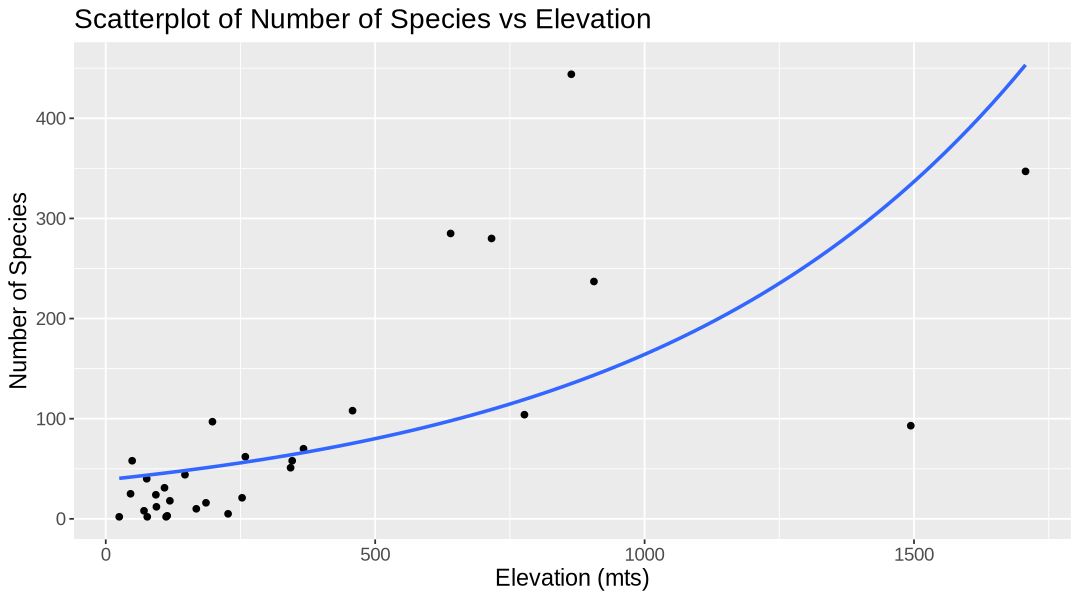

In [7]:
# Adjust these numbers so the plot looks good in your desktop.
options(repr.plot.width = 9, repr.plot.height = 5)

# species_elevation_plot <- 
#   species_elevation_plot +
#   ...(aes(..., ...), 
#       ...,
#       se = FALSE,
#       ...)

### BEGIN SOLUTION
species_elevation_plot <- 
    species_elevation_plot +
    geom_smooth(aes(elevation, species), 
                method = "glm", 
                se = FALSE,
                method.args = list(family = poisson))
### END SOLUTION

species_elevation_plot

In [8]:
test_1.3()

Test passed 😀
Test passed 🌈
Test passed 🥳
Test passed 🎉
Test passed 🎉
Test passed 🎊
Test passed 🥳
[1] "Success!"


### Estimation

As seen for other models, the parameters $\beta_0, \beta_1, \dots, \beta_{p}$ are unknown population coefficients that we want to estimate using data. 

In order to fit a Poisson regression model, we can use the function `glm()` and its argument `family = poisson` (required to specify the Poisson nature of the response).

> Poisson regression is another model of the Generalized Linear Model family

Estimates of the regression coefficients, $\hat{\beta}_0, \hat{\beta}_1, \dots \hat{\beta}_{p}$, are obtained through Maximum Likelihood.

**Question 1.4**
<br>{points: 1}

Using `glm()`, estimate a Poisson regression model with `species` as a response and `elevation` as a continuous covariate.

Call the estimated model `species_elevation_model`.
    
*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*    

In [9]:
# species_elevation_model <- ...(...,
#                            ...,
#                            ...)

### BEGIN SOLUTION
species_elevation_model <- glm(formula = species ~ elevation,
                           data = galapagos,
                           family = poisson)
### END SOLUTION

summary(species_elevation_model)


Call:
glm(formula = species ~ elevation, family = poisson, data = galapagos)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 3.665e+00  3.157e-02  116.08   <2e-16 ***
elevation   1.436e-03  3.184e-05   45.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.7  on 29  degrees of freedom
Residual deviance: 1826.2  on 28  degrees of freedom
AIC: 1991

Number of Fisher Scoring iterations: 5


In [10]:
test_1.4()

Test passed 😸
Test passed 🎉
Test passed 😀
[1] "Success!"


**Question 1.5**
<br>{points: 1}

Report the estimated coefficients, their standard errors, and corresponding $p$-values using `tidy()` with `species_elevation_model`. Include the corresponding asymptotic 95% confidence intervals. 

> Note: do not exponentiate the coefficients in this first question

Store the results in the variable `species_elevation_model_results`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [11]:
# species_elevation_model_results <- 
#    ...
#    ...(... = TRUE) %>%
#    mutate_if(is.numeric, round, 4)

### BEGIN SOLUTION
species_elevation_model_results <- 
    species_elevation_model %>%
    tidy(conf.int = TRUE) %>%
    mutate_if(is.numeric, round, 4)
### END SOLUTION

species_elevation_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.6646,0.0316,116.0800,0,3.6023,3.7260
elevation,0.0014,0.0000,45.1121,0,0.0014,0.0015


In [12]:
test_1.5()

Test passed 😸
Test passed 😸
Test passed 🎊
Test passed 🎊
Test passed 🎊
[1] "Success!"


**Question 1.6**
<br>{points: 1}

As done for logistic regression, we can also interpret the exponentiated coefficients since we are using a logarithmic function as the default link.

Use `exponentiate = TRUE` in `tidy()` to get the exponentiated estimates and the corresponding 95% confidence intervals. 

> Note that these estimates describe the association between the covariates and the mean number of plant species, rather than the log-mean.

Round numeric results to 4 decimal places.

Call the resulting object `species_elevation_exp_results`. 

*This time without a skeleton, you've done this before!  Write your code in the cell below, and run it.*

In [13]:
# write your own code here 

### BEGIN SOLUTION
species_elevation_exp_results <- 
    species_elevation_model %>%
    tidy(exponentiate = TRUE, conf.int = TRUE) %>%
    mutate_if(is.numeric, round, 4)
### END SOLUTION

species_elevation_exp_results


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),39.0424,0.0316,116.0800,0,36.6820,41.5147
elevation,1.0014,0.0000,45.1121,0,1.0014,1.0015


In [14]:
test_1.6()

Test passed 🌈
Test passed 🎉
Test passed 😸
Test passed 🥇
Test passed 🎉
[1] "Success!"


Note that `std.error` and `statistic` are not adjusted! Only the estimates and confidence limits are exponentiated.

**Question 1.7**
<br>{points: 1}

Provide an interpretation of the coefficient of `elevation` in the model of the mean of the number of plant species. 

> recall, when observational data is used, you can only establish an association between variables

> *Your answer goes here.*

### BEGIN SOLUTION
An increase of 1 meter in the maximum elevation of an island is associated with an estimated change in the mean (or average) number of plant species found by a factor of $e^{0.0014} = 1.00144$.

or 

- .... with an increase of $0.14\%$ in the average number of plant species found.

- We estimate that an increase of 1 meter in the maximum elevation of an island is associated with an average number of plant species found $1.00144$ higher.

**Key words** are: 
- estimate (or estimated)
- associated with
- times (or by a factor of, or percentage increase)
- mean (or average)

Rubric note: 

(-.25): if they say "keeping all variables constant" since there are not other variables

(-.25): if they provide an interpretation in terms of the log mean

(-.25): if the raw estimates are used with a multiplicative interpretation

(-.25): for causal statements

Comment on responses that don't use "estimate" and the conclusions read about a claim for the population (no point deduction this time).
### END SOLUTION

**Question 1.8**
<br>{points: 1}

Using the output in `species_elevation_exp_results`, which of the following statements is correct?

**A.** With 95% confidence we expect an increment in the mean number of plant species between 14% and 15% per 1 meter increase in the highest elevation of an island.

**B.** With 95% confidence we expect an increment in the mean number of plant species between 0.14% and 0.15% per 1 meter increase in the highest elevation of an island.

**C.** With 95% probability we expect an increment in the mean number of plant species between 14% and 15% per 1 meter increase in the highest elevation of an island.

**D.** With 95% probability we expect an increment in the mean number of plant species between 0.14% and 0.15% per 1 meter increase in the highest elevation of an island.

*Assign your answers to the object `answer1.8`. Your answers Your answer should be one of "A", "B", "C", or "D", surrounded by quotes.*

In [15]:
# answer1.8 <- 

### BEGIN SOLUTION
answer1.8 <- "B"
### END SOLUTION

In [16]:
test_1.8()

Test passed 🌈
Test passed 😸
[1] "Success!"


The dataset contains other continuous covariates that may be useful in understanding the number of species that are growing in each island. 

This time, we'll estimate a Poisson regression using all the covariates available.  

**Question 1.9**
<br>{points: 1}

Using `glm()`, estimate a Poisson regression model with `species` as a response and all other continuous covariate.

> note in the skeleton provided how to exclude the variable `island`

Call the model `species_poisson_model`.
    
*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*    

In [17]:
# species_poisson_model <- ...(...~ . - island,
#                            ...,
#                            ...)

### BEGIN SOLUTION
species_poisson_model <- glm(formula = species ~ . - island,
                           data = galapagos,
                           family = poisson)
### END SOLUTION

summary(species_poisson_model)


Call:
glm(formula = species ~ . - island, family = poisson, data = galapagos)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


In [18]:
test_1.9()

Test passed 😀
Test passed 🥇
Test passed 🎉
[1] "Success!"


**Question 1.10**
<br>{points: 1}

Use `exponentiate = TRUE` in `tidy()` to get the estimates of the coefficients for the model of the mean number of plant species. Include the corresponding 95% confidence intervals.

Round numeric results to 4 decimal places.

Call the resulting object `species_poisson_exp_results`. 

*Again, write your code without a skeleton in the cell below, and run it.*

In [19]:
# write your own code here 

### BEGIN SOLUTION
species_poisson_exp_results <- 
    species_poisson_model %>%
    tidy(exponentiate = TRUE, conf.int = TRUE) %>%
    mutate_if(is.numeric, round, 4)
### END SOLUTION

species_poisson_exp_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),23.4485,0.0517,60.9630,0,21.1646,25.9250
area,0.9994,0.0000,-22.0737,0,0.9994,0.9995
elevation,1.0035,0.0001,40.5070,0,1.0034,1.0037
nearest,1.0089,0.0018,4.8459,0,1.0052,1.0124
scruz,0.9943,0.0006,-9.1260,0,0.9931,0.9955
adjacent,0.9993,0.0000,-22.6078,0,0.9993,0.9994


In [20]:
test_1.10()

Test passed 🎉
Test passed 🥳
Test passed 🥇
Test passed 🥇
Test passed 🌈
[1] "Success!"


**Question 1.11**
<br>{points: 1}

Would the interpretation of the coefficient for `elevation` change with the new model? If so, provide a new interpretation, otherwise, re-write your previous one.

Again provide an interpretation for the model of the mean of the number of plant species. 

> *Your answer goes here.*

### BEGIN SOLUTION
**Keeping all other variables in the model constant, at any value,** we estimate that an increase of 1 meter in the maximum elevation of an island is associated with a change in the mean (or average) number of plant species found by a factor of $1.0035$, i.e., an increase of $0.35\%$.

Rubric note: don't penalize again previous mistakes

(-1): if there's no adjustment
### END SOLUTION

**Question 1.12**
<br>{points: 1}

Santa Cruz is the home to the largest human population in the Islands. Being close to this island can affect the growth of plant species.

The variable `scruz` measures the distance from each island to Santa Cruz (in kilometers). 

Based on the results stored in `species_poisson_exp_results`, which of the following claims is(are) true?

**A**: We estimate that keeping all other variables in the model constant, at any value, an increase of 1 kilometer in the proximity to Santa Cruz is associated with a change in the mean number of plant species by a factor of $0.9943$.

**B**: We estimate that keeping all other variables in the model constant, at any value, an increase of 1 kilometer in the proximity to Santa Cruz is associated with a $0.57\%$ decrease in the mean number of plant species.

**C**: We estimate that keeping all other variables in the model constant, at any value, an increase of 5 kilometers in the proximity to Santa Cruz is associated with a $2.8\%$ decrease in the mean number of plant species since $(0.9943^{5} -1)\times 100\% = - 2.8\%$.

**D**: We estimate that keeping all other variables in the model constant, at any value, an increase of 1 kilometer in the proximity to Santa Cruz is associated with an increase in the mean number of plant species by a factor of $0.57\%$.

*Assign your answer to the object `answer1.12`. Your answers have to be included in a single string indicating the correct options **in alphabetical order** and surrounded by quotes (e.g., `"AB"` indicates you are selecting the two options).*

In [21]:
# answer1.12 <- 

### BEGIN SOLUTION
answer1.12 <- "ABC"
### END SOLUTION

In [22]:
test_1.12()

Test passed 😸
Test passed 😀
[1] "Success!"


### Residuals

For a Poisson random variable, the variance equals the mean. Thus, the residuals are usually adjusted by the standard deviation of each observation. 

For the case of Poisson regression, the Pearson residuals are defined as:

$$\frac{y_i - \hat{\lambda}_i}{\sqrt{\hat{\lambda}_i}}$$

where $\hat{\lambda}_i$ is the fitted value using the exponentiated model, i.e., `type = "response"` in R.

**Question 1.13**
<br>{points: 1}

Use the function `augment()` to add fitted values and residuals to the `galapagos` dataset. Select only the columns `species`, `.fitted` and `.resid`.

Next, add to the tibble the residuals computed with the function `residuals` on the estimated model `species_poisson_model`, using `type = "response"` and `type = "pearson"`.

Compute the Pearson residuals using the fitted values and add them to the tibble.

*Assign your answer to the object `species_poisson_residuals`. Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [23]:
# species_poisson_residuals <- ... %>%
#               ...() %>%
#               dplyr::select(...,..., ...) %>%
#               mutate(pred_mean = ...,
#                      resid_raw = residuals(..., type = "response"),
#                      resid_pearson =...(...,...),
#                      pearson_byhand = .../sqrt(...))

### BEGIN SOLUTION
species_poisson_residuals <- species_poisson_model %>%
              augment() %>%
               dplyr::select(species,.fitted, .resid) %>%
                     mutate(pred_mean = species_poisson_model$fitted,
                     resid_raw = residuals(species_poisson_model, type = "response"),
                     resid_pearson =residuals(species_poisson_model,"pearson"),
                     pearson_byhand = (species-pred_mean)/sqrt(pred_mean))
             
### END SOLUTION

head(species_poisson_residuals)

species,.fitted,.resid,pred_mean,resid_raw,resid_pearson,pearson_byhand
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
58,4.365952,-2.4514468,78.72434,-20.724337,-2.3357489,-2.3357489
31,3.015678,2.1773837,20.40293,10.597071,2.3460625,2.3460625
3,3.247365,-5.7054741,25.72248,-22.722476,-4.4802192,-4.4802192
25,3.063640,0.7566071,21.40533,3.594673,0.7769596,0.7769596
2,2.834065,-4.6330643,17.01448,-15.014477,-3.6399960,-3.6399960
18,3.599651,-3.4112843,36.58545,-18.585449,-3.0726909,-3.0726909


In [24]:
test_1.13()

Test passed 😀
Test passed 😀
Test passed 🎉
Test passed 😀
[1] "Success!"


**Question 1.14**
<br>{points: 1}

Based on the results obtained in `species_poisson_residuals`, which of the following observations are correct?

**A.** The column `.resid` in the output of `augment()` contains the values of the response minus the predicted means of number of plants.

**B.** The `.resid` computed by `augment()` are neither the raw nor the Pearson residuals.

**C.** The Pearson's residuals can be computed plugging the `species` and `.fitted` in the formula given in the previous cell.

**D** The `.fitted` values can be interpreted as the predicted mean of plant species for the islands in our sample.

*Assign your answers to the object answer1.14. Your answers must be included in a single string indicating the correct options in alphabetical order and surrounded by quotes (e.g., "ABC" indicates you are selecting the first three options).*

In [25]:
# answer1.14 <- 

### BEGIN SOLUTION
answer1.14 <- "B"
### END SOLUTION

In [26]:
test_1.14()

Test passed 🥳
Test passed 🥇
[1] "Success!"


### Overdispersion

As in Logistic regression, a problem with Poisson regression is that the variance of a Poisson random variable equals the mean, which in practice may not be observed.

Thus, Poisson regression usually exhibits overdispersion. An easy way to check is to fit a model using the *quasilikelihood* method and check if the dispersion parameter is very different from 1.

In [27]:
species_poisson_quasi <- summary(glm(
    formula = species ~ . -island,
    data = galapagos,
    family = quasipoisson))

species_poisson_quasi


Call:
glm(formula = species ~ . - island, family = quasipoisson, data = galapagos)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1548079  0.2915901  10.819 1.03e-10 ***
area        -0.0005799  0.0001480  -3.918 0.000649 ***
elevation    0.0035406  0.0004925   7.189 1.98e-07 ***
nearest      0.0088256  0.0102622   0.860 0.398292    
scruz       -0.0057094  0.0035251  -1.620 0.118380    
adjacent    -0.0006630  0.0001653  -4.012 0.000511 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 31.74921)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


While there are formal tests and other functions to estimate overdispersion, there is clear evidence of overdispersion here (31.75 is much larger than 1).

Overdispersion affects the standard errors and thus the inference results of the maximum likelihood estimated model. Thus, in this case the quasilikelihood estimates provide more reliable results.

### You are done!!